# Data analysis

- Connect epoch data with metadata
- Write function to analyse difference between risk/no risk, cdi score and parents dyslexia
- ...

# Imports

In [27]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from math import nan
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
from eegyolk import helper_functions as hf # library useful for eeg and erp data cleaning
from eegyolk import initialization_functions #library to import data
from eegyolk import epod_helper

## Load metadata

In [2]:
metadata = pd.read_csv('F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\metadata.csv', sep = ',')

In [3]:
metadata

,eeg_file,ParticipantID,test,sex,age_months,age_months_days,dyslexic_parent,Group_AccToParents,eeg_path,path_epoch,epoch_file
0,101a,101,a,m,20,20;22,m,At risk,F:\Stage\ePODIUM\Data\ePodium (Projectfolder)\...,F:\Stage\ePODIUM\ePodium\dyslexiaprediction_na...,101a_epo.fif
1,101b,101,b,m,23,23;16,m,At risk,F:\Stage\ePODIUM\Data\ePodium (Projectfolder)\...,F:\Stage\ePODIUM\ePodium\dyslexiaprediction_na...,101b_epo.fif
2,102a,102,a,f,20,20;27,Nee,Control,F:\Stage\ePODIUM\Data\ePodium (Projectfolder)\...,F:\Stage\ePODIUM\ePodium\dyslexiaprediction_na...,102a_epo.fif
3,102b,102,b,f,23,23;16,Nee,Control,F:\Stage\ePODIUM\Data\ePodium (Projectfolder)\...,F:\Stage\ePODIUM\ePodium\dyslexiaprediction_na...,102b_epo.fif
4,103a,103,a,f,20,20;23,m,At risk,F:\Stage\ePODIUM\Data\ePodium (Projectfolder)\...,F:\Stage\ePODIUM\ePodium\dyslexiaprediction_na...,103a_epo.fif


## Participant information

count     5.000000
mean     21.200000
std       1.643168
min      20.000000
25%      20.000000
50%      20.000000
75%      23.000000
max      23.000000
Name: age_months, dtype: float64

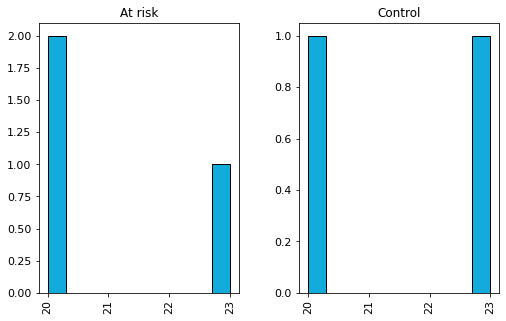

In [4]:
hist = metadata.hist(column='age_months',by='Group_AccToParents',color='#12ABDB',sharex=True, figsize=(8,5), xlabelsize=11, ylabelsize=11,bins=10,ec='black')
metadata['age_months'].describe()

In [5]:
metadata.groupby('Group_AccToParents')['sex'].value_counts()

Group_AccToParents  sex
At risk             m      2
                    f      1
Control             f      2
Name: sex, dtype: int64

In [6]:
metadata.groupby('Group_AccToParents')['dyslexic_parent'].value_counts()

Group_AccToParents  dyslexic_parent
At risk             m                  3
Control             Nee                2
Name: dyslexic_parent, dtype: int64

## ERP per group

In [21]:
event_dictionary = epod_helper.event_dictionary

def data_analysis(dataframe, group, value, event_dictionary):
    epochs = []
    evoked_pp = []
    dataframe = dataframe.loc[metadata[group] == value]
    
    for index, file in dataframe.iterrows():
        print(f"Checking out file: {file['epoch_file']}")
        path = os.path.join(file['path_epoch'], file['epoch_file'])
        epoch = mne.read_epochs(path, preload=True)
        epochs.append(epoch)
    
    evoked = hf.evoked_responses(epochs, event_dictionary)
    
    for i in range(len(evoked)):
        grand_avg = mne.grand_average(evoked[i])
        evoked_pp.append(grand_avg)
    
    grand_evoked = mne.grand_average(evoked_pp)
    
    return grand_evoked.plot(spatial_colors=True)

Checking out file: 101a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\101a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 101b_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\101b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 103a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\103a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadat

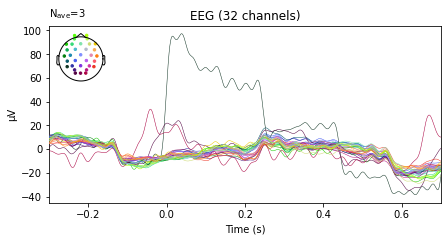

In [10]:
atrisk = data_analysis(metadata, group='Group_AccToParents', value = 'At risk', event_dictionary = epod_helper.event_dictionary)

Checking out file: 102a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\102a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2389 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 102b_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\102b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


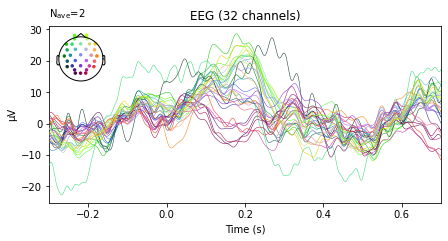

In [11]:
control = data_analysis(metadata, group='Group_AccToParents', value = 'Control', event_dictionary = epod_helper.event_dictionary)

Checking out file: 101a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\101a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 102a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\102a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2389 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 103a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\103a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadat

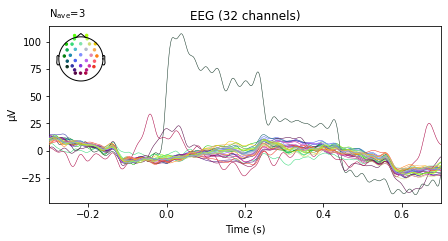

In [12]:
test_a = data_analysis(metadata, group='test', value = 'a', event_dictionary = epod_helper.event_dictionary)

Checking out file: 101b_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\101b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 102b_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\102b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


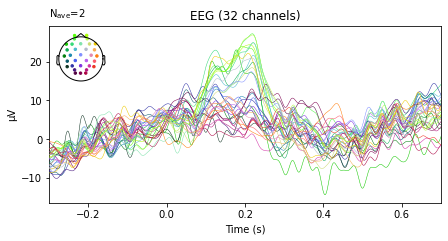

AttributeError: 'EvokedArray' object has no attribute 'plot_psd'

In [19]:
test_b = data_analysis(metadata, group='test', value = 'b', event_dictionary = epod_helper.event_dictionary)

## Frequency domain features

In [15]:
dataframe = metadata
epochs = []
for index, file in dataframe.iterrows():
    print(f"Checking out file: {file['epoch_file']}")
    path = os.path.join(file['path_epoch'], file['epoch_file'])
    epoch = mne.read_epochs(path, preload=True)
    epochs.append(epoch)

Checking out file: 101a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\101a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 101b_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\101b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 102a_epo.fif
Reading F:\Stage\ePODIUM\ePodium\dyslexiaprediction_nadine\epochs\102a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadat

Computing power over frequency

    Using multitaper spectrum estimation with 7 DPSS windows


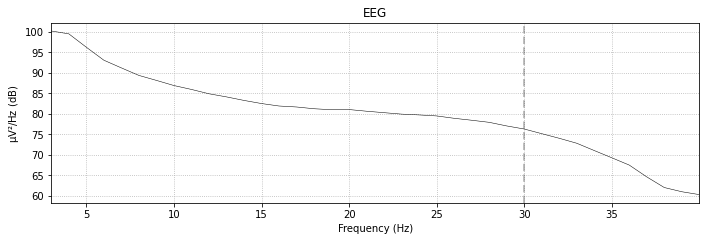

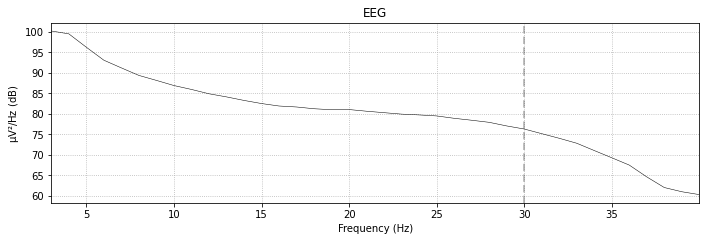

In [24]:
epochs[0].plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False) # power over frequency

In [31]:
fmin, fmax = 4., 9.
#sfreq = epochs[1].info['sfreq']  # the sampling frequency
tmin = 0.0  # exclude the baseline period
#epochs[0].load_data().pick_types(meg='grad')  # just keep MEG and no EOG now
con = spectral_connectivity_epochs(
    epochs, method='pli', mode='multitaper', fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

# Now, visualize the connectivity in 3D:
plot_sensors_connectivity(
    epochs.info,
    con.get_data(output='dense')[:, :, 0])

Connectivity computation...


AttributeError: 'EpochsFIF' object has no attribute 'shape'